In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1]. values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Y = y_train

mask = Y == 1

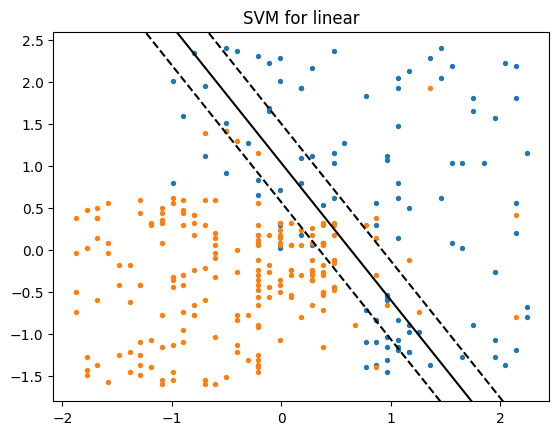

Accuracy for SVM with linear 0.82


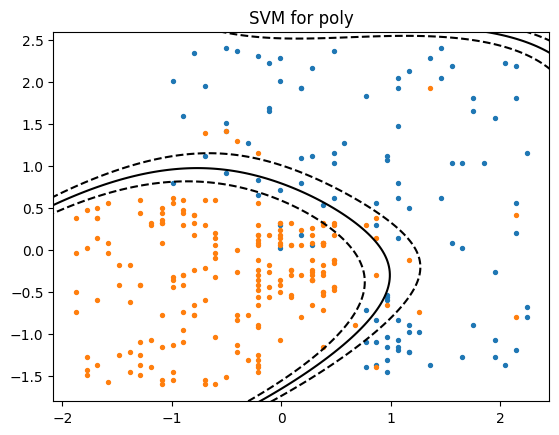

Accuracy for SVM with poly 0.88


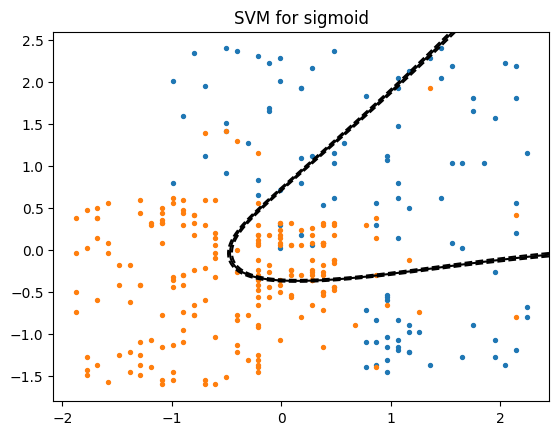

Accuracy for SVM with sigmoid 0.59


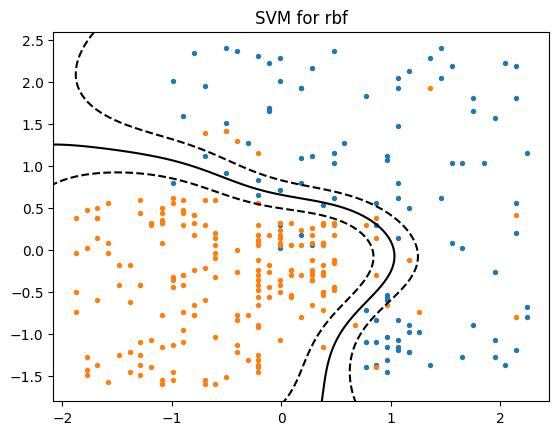

Accuracy for SVM with rbf 0.88


In [15]:
for kernel in ('linear', 'poly', 'sigmoid', 'rbf'):
  clf = SVC(kernel=kernel, gamma=1, coef0=1)
  clf.fit(X_train, y_train)
  y_pre = clf.predict(X_test)
  y_pre[y_pre ==-1] = 2

  plt.clf()
  plt.scatter(X_train[mask, 0], X_train[mask, 1], s = 8)
  plt.scatter(X_train[~mask, 0], X_train[~mask, 1], s = 8)

  plt.axis('tight')
  x_min = -3
  x_max = 3
  y_min = -3
  y_max = 3

  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
  plt.contour(XX, YY, Z.reshape(XX.shape), colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

  plt.title('SVM for ' + kernel)
  plt.show()
  print('Accuracy for SVM with', kernel,  accuracy_score(y_test, y_pre))

In [16]:
y_train.shape

(300,)